# Ryan's Final Project (Regression Analysis)
**Author:** Ryan Krabbe  
**Date:** 4/17/2025

**Objective:** Evaluate different Linear Regression models using the Medical Insurance Dataset to predict medical/insurance charges using carefully selected input variables.


## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

In [53]:
# Load the data
df = pd.read_csv(r"C:\Projects\ml_regresion_krabbe\medical_insurance_data\insurance.csv", header=0)

# Display first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics

In [54]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [55]:
# Display summary statistics
print(df.describe(include='all').T)

           count unique        top  freq          mean           std  \
age       1338.0    NaN        NaN   NaN     39.207025      14.04996   
sex         1338      2       male   676           NaN           NaN   
bmi       1338.0    NaN        NaN   NaN     30.663397      6.098187   
children  1338.0    NaN        NaN   NaN      1.094918      1.205493   
smoker      1338      2         no  1064           NaN           NaN   
region      1338      4  southeast   364           NaN           NaN   
charges   1338.0    NaN        NaN   NaN  13270.422265  12110.011237   

                min         25%       50%           75%          max  
age            18.0        27.0      39.0          51.0         64.0  
sex             NaN         NaN       NaN           NaN          NaN  
bmi           15.96    26.29625      30.4      34.69375        53.13  
children        0.0         0.0       1.0           2.0          5.0  
smoker          NaN         NaN       NaN           NaN          NaN

## Reflection 1: What do you notice about the dataset? Are there any data issues?
- There are no missing values within the datset.
- `sex`, `smoker`, and `region` will all need to be encoded for the regression modeling because they are non-numeric.

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

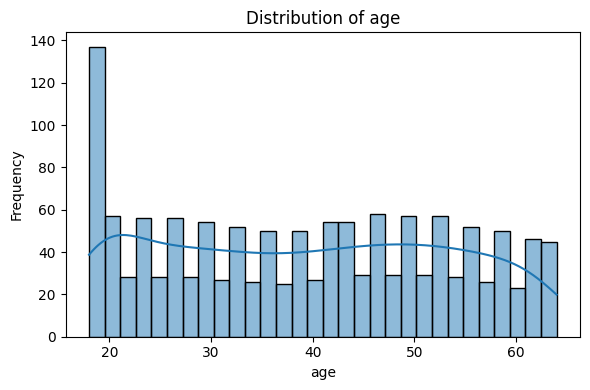

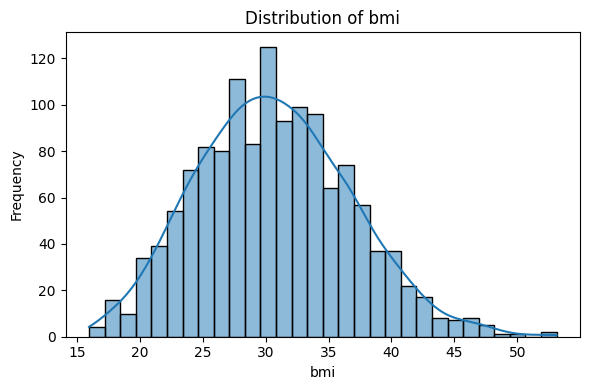

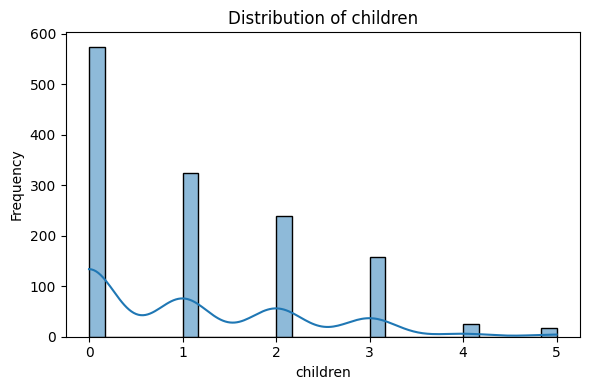

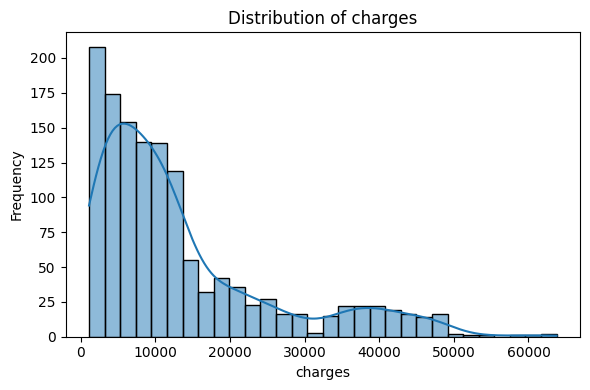

In [56]:
# Histograms for numeric features
numeric_cols = ['age', 'bmi', 'children', 'charges']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

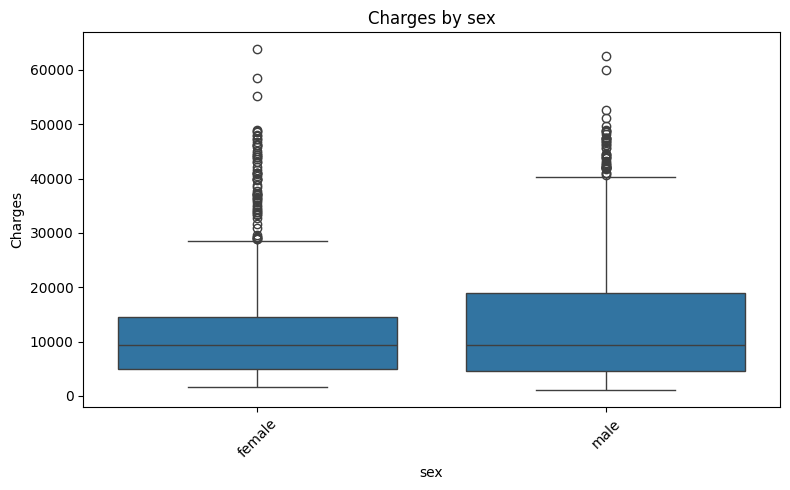

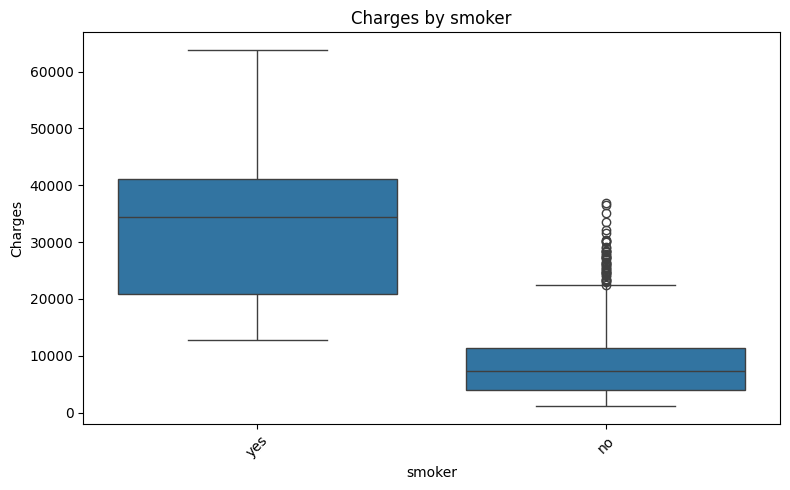

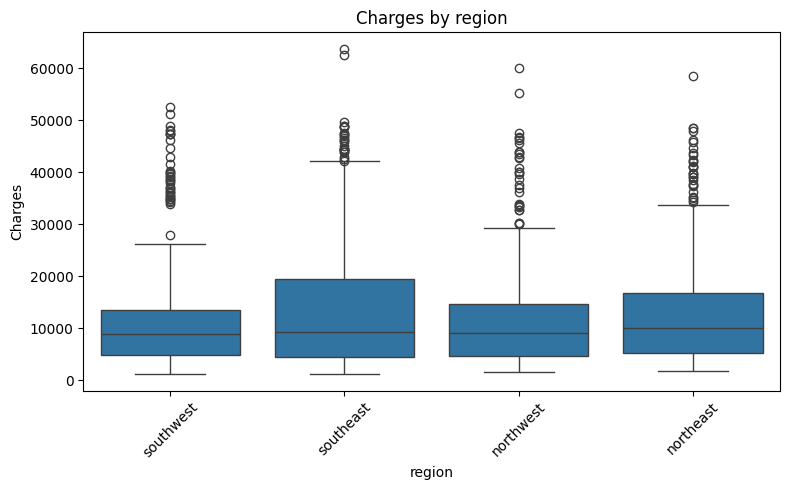

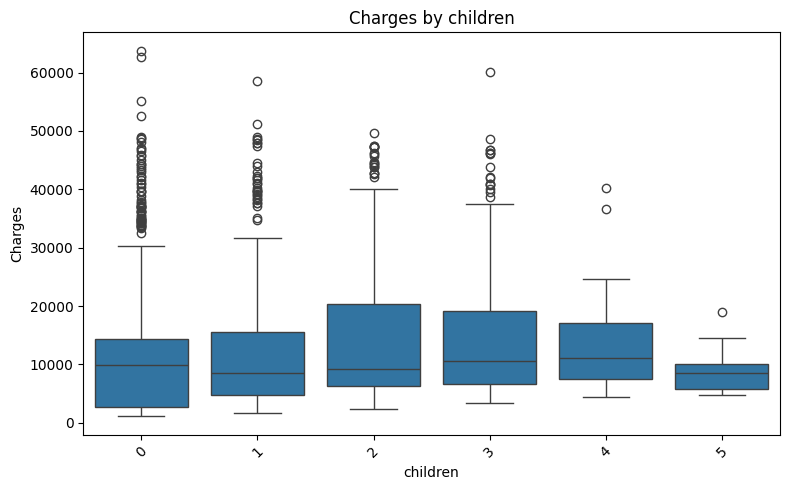

In [57]:
# Boxplots for categorical vs. charges
categorical_cols = ['sex', 'smoker', 'region', 'children']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y='charges')
    plt.title(f'Charges by {col}')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

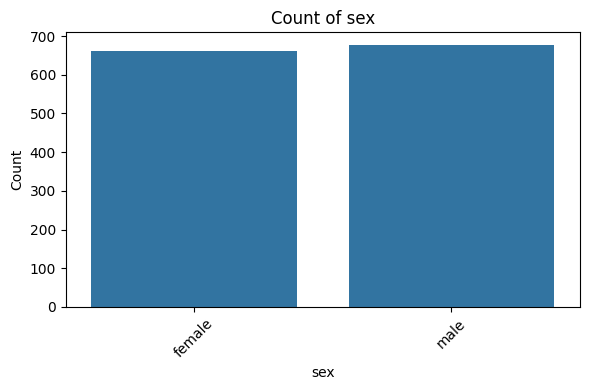

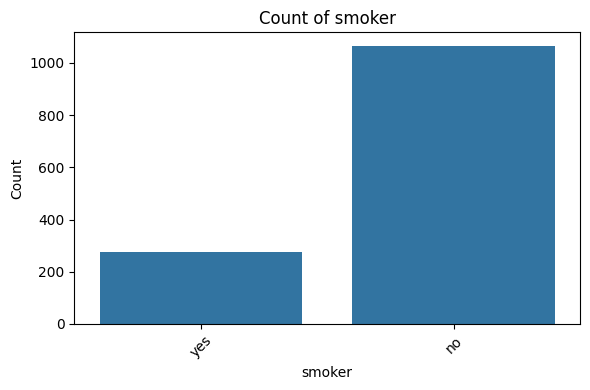

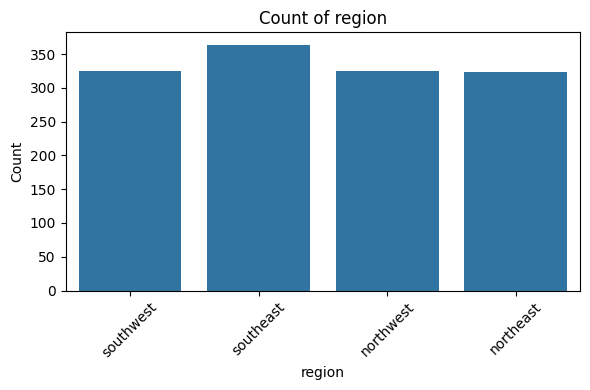

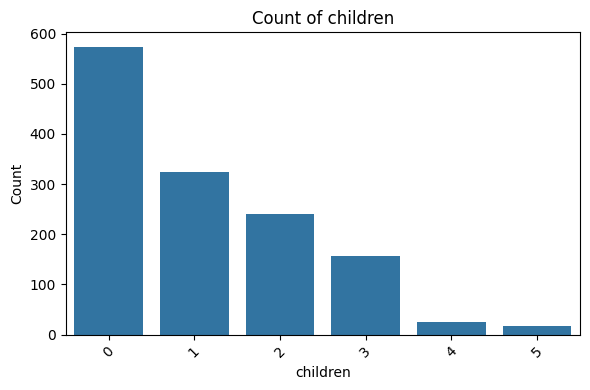

In [58]:
# Count plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 2.2 Handle missing values and clean data
- There are no missing values in this data set so this step is not needed.
- As mentioned in Section 1, `sex`, `smoker`, and `region` are all non-numeric and will be encoded in the next step for Regression Modeling.

### 2.3 Feature selection and engineering

In [59]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Show encoded data
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Reflection 2
- The most glaring thing I noticed was how much higher the medical costs were for features that someone would usually correlate with poor health such as `smoker`, and high `bmi`. The difference in medical costs for non-smokers and people with lower BMI was significant and something I want to dive deeper into during modeling.
- As mentioned above, I did not need to handle missing values since there were none, however, I did convert the non-numeric variables `sex`, `smoker`, and `region` to non-numeric as this is essential to my Regression Modeling going forward.

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

- Since I'm trying to predict insurance/medical costs the target variable that I'm going to work with is `charges`
- Below are the input features that I'm going to work with
    - `age` - Medical costs tend to correlate with age
    - `bmi` - Higher medical costs correlate with higher BMI
    - `smoker` - Higher medical costs correlate with smokers
    - `children` - Potentially family size or number of children could affect costs
    - `sex` - Male vs female could affect costs

### 3.2 Define X and y

In [60]:
# Define target variable
y = df_encoded['charges']

# Define input features
X = df_encoded.drop(['charges'], axis=1)

## Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
- I chose `charges` as my target variable because it's ideal for regression modeling and the main variable the dataset is modeled around for predicting medical/insurance costs.
- I chose my input features based on strong relationships with the target variable, `charges`. Each input feature will help improve the predictions of the model.

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split.

In [61]:
from sklearn.model_selection import train_test_split

# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4.2 Train model using Scikit-Learn model.fit() method

In [67]:
from sklearn.linear_model import LinearRegression

# Initialize the model and fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# print to get rid of HTML representation error
print(model)

LinearRegression()


### 4.3 Evalulate performance

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

R² Score: 0.7836
Mean Absolute Error (MAE): $4181.19
Root Mean Squared Error (RMSE): $5796.28


## Reflection 4. How well did the model perform? Any surprises in the results?

- **R² Score 78.36%**: The R² score means the model explains 78.36% of the variance in medical charges, which is a strong score.

- **Mean Absolute Error (MAE): \$4,181.19**  
  The MAE indicates that the model’s predictions are, on average, \$4,181.19 off from the actual medical charges. This could have been caused by a heavy right skew in the dataset or potential outliers. Overall, \$4,181.19 isn’t bad considering that the target variable `charges` spans from around \$1,000 to \$60,000.

- **Root Mean Squared Error (RMSE): \$5,796.28**  
  The RMSE is higher than the MAE, which makes sense because it penalizes larger errors more heavily. As mentioned above, \$5,796.28 isn’t a bad error margin considering the range of the target `charges`. The higher RMSE was likely caused by a few high-cost outliers.

## Section 5: Improve the Model or Try Alternates

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [69]:
# Linear Regression Pipeline
linreg_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('linear_model', LinearRegression())
])

# Fit Linear Regression Pipeline on Training Data
linreg_pipeline.fit(X_train, y_train)

# Predict on the Test Set
y_pred_linreg = linreg_pipeline.predict(X_test)

# Evaluate Model
r2 = r2_score(y_test, y_pred_linreg)
mae = mean_absolute_error(y_test, y_pred_linreg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linreg))

# Print results
print(f"Standard Scaler Linear Regression:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

Standard Scaler Linear Regression:
R² Score: 0.7836
Mean Absolute Error (MAE): $4181.19
Root Mean Squared Error (RMSE): $5796.28


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [70]:
# Polynomial Features Pipeline
poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('standard_scaler', StandardScaler()),
    ('linear_model', LinearRegression())
])

# Fit Polynomial Features Pipeline on Training Data
poly_pipeline.fit(X_train, y_train)

# Predict on the Test Set
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluate model
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Print results
print("Polynomial Features Linear Regression:")
print(f"R² Score: {r2_poly:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_poly:.2f}")

Polynomial Features Linear Regression:
R² Score: 0.8486
Mean Absolute Error (MAE): $2937.92
Root Mean Squared Error (RMSE): $4847.50


### 5.3 Compare performance of all models across the same performance metrics

### **Regression Pipeline Model Comparison**

| Metric         | Standard Scaler Linear Regression | Polynomial Features (Degree=3) | Notes |
|----------------|-----------------------------------|----------------------------------|-------|
| **R² Score**   | 0.7836                            | 0.8486            | Polynomial model explained more variance in charges |
| **MAE**        | $4,181.19                         | $2937.92           | Polynomial model was more accurate than the Standard Scaler Linear Regression model |
| **RMSE**       | $5,796.28                         | $4847.50          | Polynomial model had a lower RMSE indicating that there were fewer large prediction errors |


## Reflection 5: Which models performed better? How does scaling impact results?
- The Polynomial Regression model outperformed the Standard Scaler Linear Regression model in every metric. I believe this is due to some relationships in the data that aren't purely linear. By introducing the advanced model, I was able to capture some of those relationships within the features of the data that led to improved performance.
- The Standard Scaler Linear Regression model performed identically to the original Linear Regression model. Adding the scaling to the model changed the coefficient values behind the scenes so implementing something such as Ridge within the model would have more than likely lead to different results, but by just adding the scaling to the model nothing changed.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.

### Regression Pipeline Model Comparison

| Metric         | Original Linear Regression | Standard Scaler Linear Regression | Polynomial Features (Degree=3) | Notes |
|----------------|-----------------------------|-----------------------------------|----------------------------------|-------|
| **R² Score**   | 0.7836                      | 0.7836                            | 0.8486                           | Polynomial model explained more variance in charges |
| **MAE**        | $4,181.19                   | $4,181.19                         | $2,937.92                        | Polynomial model was more accurate than the Standard Scaler Linear Regression model |
| **RMSE**       | $5,796.28                   | $5,796.28                         | $4,847.50                        | Polynomial model had a lower RMSE indicating that there were fewer large prediction errors |


### 6.2 Discuss Challenges Faced
- I didn't run into nearly as many challenges from this dataset as I have from other datasets in previous modules. A lot of that was due to this dataset not having any missing values so it was much easier to work with the data.
- The pipeline portion was a bit tricky at first, but ended up making sense as I worked through it. I didn't have any actual challenges generating the results from the different models, but figuring out how to set up the new models took a little bit.

### 6.3 If you had more time, what would you try next?
- I would add `Ridge` to my Standard Scaler Linear Regression model to see how the results would change. I am fairly certain that the results would change by adding `Ridge` to the model since adding the scaling changed some of the coefficient values behind the scenes.
- I would also maybe try models such as `RandomForestRegressor` and `GradientBoostingRegressor` to see what kind of results I get from those models compared to the ones I used. I've used RandomForest and GradientBoosting classified models before and I had success with both so I'd like to introduce those to regression modeling as well.

## Reflection 6. What did you learn from this project?
- I learned how to use regression models to make predictions on a target variable and carefully selected input features. Additionally, I learned how to build pipelines to make my models cleaner and more efficient.
- Using piplines allowed me to incorporate different preprocessing steps into my model like scaling and polynomial features to see how it would affect performance.